
Pentru n=[1000, 2000, 3000]:
Valoarea medie exacta: 165 cm
Valoarea medie simulată: 165.15 cm
Deviatia standard exacta: 10.00 cm
Deviatia standard simulată: 9.90 cm
Proportia in intervalul [160, 170] exacta: 0.3829
Proportia in intervalul [160, 170] simulata: 0.3910


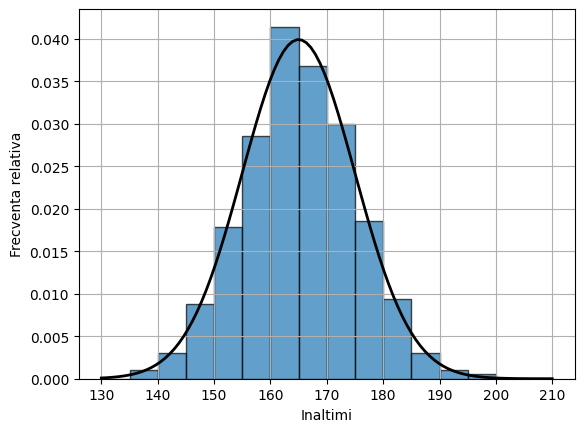


Pentru n=[1000, 2000, 3000]:
Valoarea medie exacta: 165 cm
Valoarea medie simulată: 165.35 cm
Deviatia standard exacta: 10.00 cm
Deviatia standard simulată: 9.93 cm
Proportia in intervalul [160, 170] exacta: 0.3829
Proportia in intervalul [160, 170] simulata: 0.3880


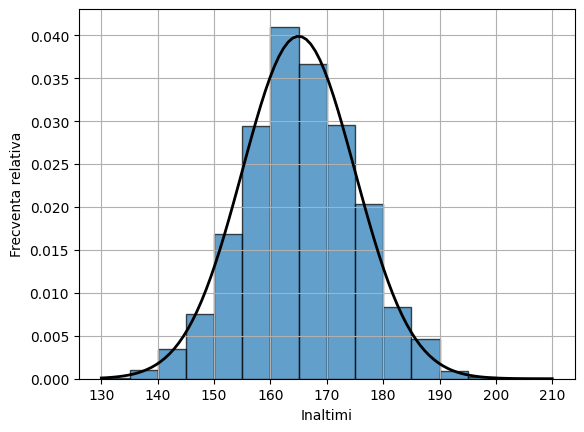


Pentru n=[1000, 2000, 3000]:
Valoarea medie exacta: 165 cm
Valoarea medie simulată: 165.15 cm
Deviatia standard exacta: 10.00 cm
Deviatia standard simulată: 10.05 cm
Proportia in intervalul [160, 170] exacta: 0.3829
Proportia in intervalul [160, 170] simulata: 0.3807


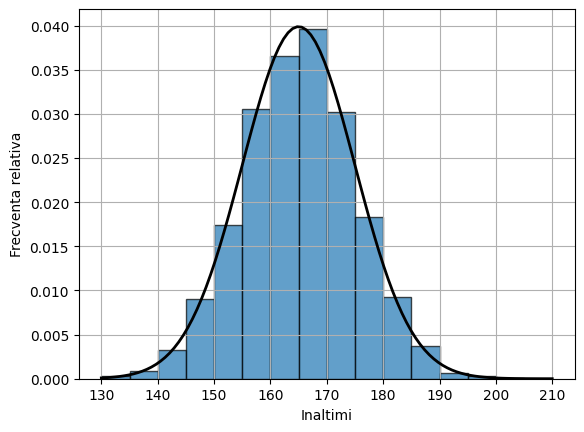

In [18]:
from scipy.stats import norm
from numpy import mean, std, linspace
import matplotlib.pyplot as plt

# Parametrii distributiei normale
m = 165 # media
sigma = 10 # deviatia standard

n = [1000, 2000, 3000] # numarul de total de date

for i in n:
    # Generararea a n valori aleatoare folosind distributia normala
    heights = norm.rvs(loc=m, scale=sigma, size=i)

    # 1.1 Histograma
    plt.hist(heights, bins=16, range=(130, 210), density=True, edgecolor='black', alpha=0.7)
    plt.xlabel("Inaltimi")
    plt.ylabel("Frecventa relativa")
    plt.grid(True)

    # 1.2 Densitatea de probabilitate
    x = linspace(130, 210, 100)
    p = norm.pdf(x, m, sigma)
    plot(x, p, 'k', linewidth=2, label=f'Graficul funcției de densitate pentru n={i}')

    # Calculul mediei, deviației standard și proporției în intervalul [160, 170]
    mean_heights = mean(heights)
    std_dev = std(heights)
    proportion_simulated = sum((heights >= 160) & (heights <= 170)) / i

    # Valoarea exacta a proportiei
    proportion_exact = norm.cdf(170, m, sigma) - norm.cdf(160, m, sigma)


    print(f"\nPentru n={n}:")
    print(f"Valoarea medie exacta: {m} cm")
    print(f"Valoarea medie simulată: {mean_heights:.2f} cm")
    print(f"Deviatia standard exacta: {sigma:.2f} cm")
    print(f"Deviatia standard simulată: {std_dev:.2f} cm")
    print(f"Proportia in intervalul [160, 170] exacta: {proportion_exact:.4f}")
    print(f"Proportia in intervalul [160, 170] simulata: {proportion_simulated:.4f}")

    plt.show()

In [21]:
from scipy.stats import expon, uniform
from numpy import mean, std, multiply

lambdaExp = 1/5 # parametrul distributiei exponențiale
a, b = 4, 6 # capetele intervalului distribuției uniforme

prob_I1 = 0.4 # probabilitatea pentru imprimanta 1
prob_I2 = 0.6 # probabilitatea pentru imprimanta 2

simulari = 5000 # numarul de simulari

# generarea datelor folosind distributia exponentiala pentru I1
samples_I1 = expon.rvs(scale=1/lambdaExp, size=simulari)

# generarea datelor folosind distributia uniforma pentru I2
samples_I2 = uniform.rvs(loc=a, scale=b-a, size=simulari)

# 2.1 Estimarea valorii medii si a deviatiei standard pentru timpul de printare al posterului
mean_I1 = mean(samples_I1)
std_I1 = std(samples_I1)

mean_I2 = mean(samples_I2)
std_I2 = std(samples_I2)

# Timpul de printare
# Regula VALORILOR ASTEPTATE pentru sume de V.A. INDEPENDENDENTE
# mean_timp_total = suma valorilor medii ale timpilor de printare pentru fiecare imprimanta
# deviatie_timp_total = radical din suma patratelor deviatiilor standard ale timpilor de printare pentru fiecare imprimanta

mean_timp_total = multiply(prob_I1, mean_I1) + multiply(prob_I2, mean_I2)
std_timp_total = (multiply(prob_I1, std_I1**2) + multiply(prob_I2, std_I2**2))**0.5

print(f'Valoarea medie a timpului total: {mean_timp_total:.4f} secunde')
print(f'Deviata standard a timpului total: {std_timp_total:.4f} secunde')

# Probabilitatea ca timpul de printare al posterului sa fie < 5 secunde
# P(T < 5) = CDF la valoarea 5 pentru distributia celor 2 imprimante
dist_I1 = expon(scale=1/lambdaExp)
dist_I2 = uniform(loc=a, scale=b-a)

# Frecvente simulate
freq_sim_I1 = mean(samples_I1 < 5)
freq_sim_I2 = mean(samples_I2 < 5)

# Probabilitatea simulata si cea teoretica
prob_sim = multiply(prob_I1, freq_sim_I1) + multiply(prob_I2, freq_sim_I2)
prob_exact = dist_I1.cdf(5) * prob_I1 + dist_I2.cdf(5) * prob_I2

print(f'Probabilitatea ca timpul de printare al posterului sa fie < 5 secunde (simulare): {prob_sim:.4f}')
print(f'Probabilitatea ca timpul de printare al posterului sa fie < 5 secunde (exact): {prob_exact:.4f}')

Valoarea medie a timpului total: 5.0626 secunde
Deviata standard a timpului total: 3.3457 secunde
Probabilitatea ca timpul de printare al posterului sa fie < 5 secunde (simulare): 0.5522
Probabilitatea ca timpul de printare al posterului sa fie < 5 secunde (exact): 0.5528


In [22]:
from scipy.stats import uniform
from numpy import exp, mean
from scipy.integrate import quad

# Functia de densitate
def functie_densitate(x):
    return exp(-x**2)

# Intervalul de integrare
a, b = -1, 3
simulari = 5000

# Extragem v.a. independente uniform distribuite pe [-1, 3]
samples = uniform.rvs(loc=a, scale=b-a, size=simulari)
# Calculam valorile functiei de densitate pentru fiecare valoare generata
values = functie_densitate(samples)

# Calculam valoarea exacta a integralei
integrala = quad(functie_densitate, a, b)
# Calculam valoarea estimata a integralei prin metoda Monte Carlo
estimated_Monte_Carlo = (b-a) * mean(values)

print(f'Valoarea exacta a integralei: {integrala[0]:.4f}')
print(f'Valoarea estimata a integralei prin metoda Monte Carlo: {estimated_Monte_Carlo:.4f}')

Valoarea exacta a integralei: 1.6330
Valoarea estimata a integralei prin metoda Monte Carlo: 1.6620
